# DSCI 100 Project Final Report

Miyuki, Jane, Rachel & Meg

### Introduction



We will be exploring video games and the people who play video games, specifically the game MineCraft. To do this, play sessions are being recorded as well as individual player information. This includes information such as a players demographic information, playing time, and their skill. From this, data sets are created and will be used for analysis and understanding.

To help determine “kinds” of players, our project aims to analyze the relationship between the age and the time played of players in the dataset.

The dataset that we will be using to determine the relationship between “age” and “time_played” is the “players.csv” data set. This data set contains information about the players experience, subscription status, hashedEmail, played_hours, name, gender and age. Since this data contains information on both the age and the played hours, this will be the most relevant in determining the relationship between the 2.

### Methods and Results

**LOADING DATA**

In [3]:
set.seed(800)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(scales)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [4]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url)
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


In [5]:
url_2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions<- read_csv(url_2)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**SUMMARY**

Exploring relationships of variables...

In [6]:
#TIDYING OG DATA:

players_tidy <- players |>
    select(-subscribe, -hashedEmail, -individualId, -organizationName, -name)
players_tidy

experience,played_hours,gender,age
<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Male,9
Veteran,3.8,Male,17
Veteran,0.0,Male,17
⋮,⋮,⋮,⋮
Amateur,0.0,Prefer not to say,17
Amateur,2.3,Male,17
Pro,0.2,Other,91


In [7]:
#SUMMARY OF DATA: Calculating the mean number of hours each experience level spends playing

players_exp_mean <- players_tidy |>
group_by(experience) |>
summarize(mean_hours = mean(played_hours))

players_exp_mean

experience,mean_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


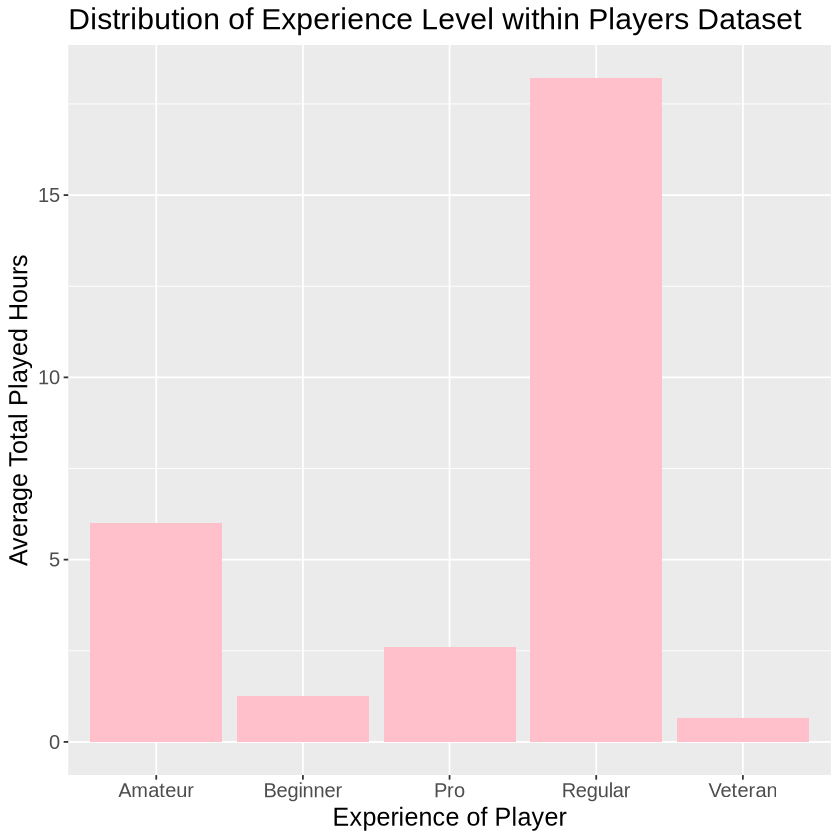

In [8]:
#SUMMARY OF DATA: Finding the distribution of player experience within dataset

players_experience_plot <- players_exp_mean |>
    ggplot(aes(x = experience, y = mean_hours)) +
    geom_bar(stat="identity", fill = "pink") +
    labs(x = "Experience of Player",
        y = "Average Total Played Hours") +
    theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Experience Level within Players Dataset") 


players_experience_plot

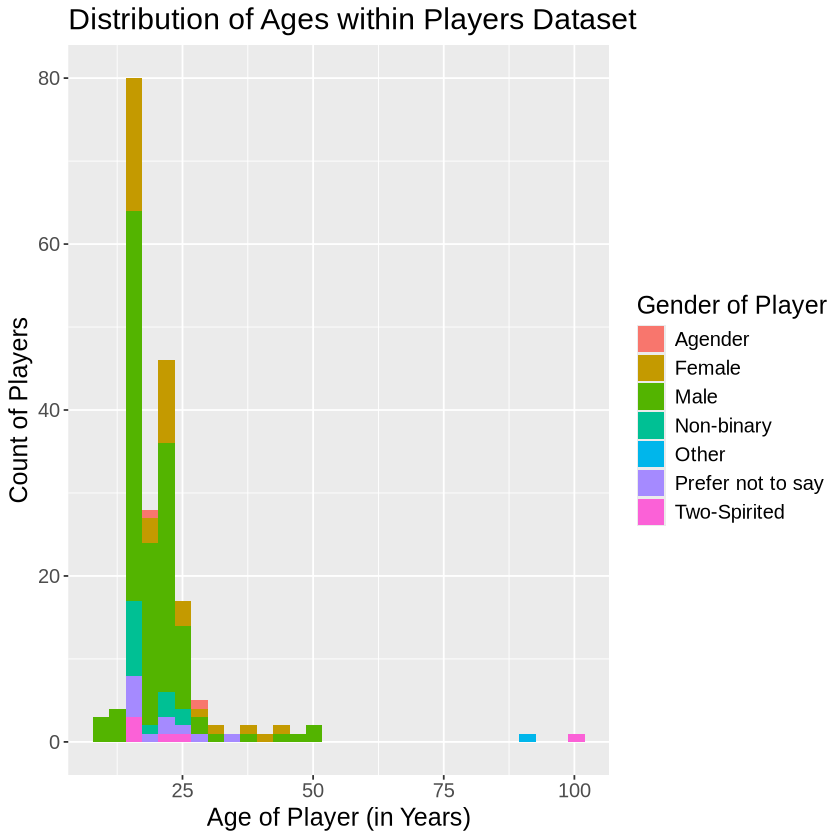

In [9]:
#SUMMARY OF DATA: Finding the distribution of ages within dataset

players_age_plot <- players_tidy |>
    ggplot(aes(x = age, fill = gender)) +
    geom_histogram(bins = 30) +
    labs(x = "Age of Player (in Years)",
        y = "Count of Players",
        fill = "Gender of Player") +
    theme(text = element_text(size = 15)) +
    ggtitle("Distribution of Ages within Players Dataset")

players_age_plot

In [10]:
#SUMMARY OF DATA: Calculating the mean number of hours each age spends playing

players_age_mean <- players_tidy |>
group_by(age) |>
summarize(mean_hours = mean(played_hours))

players_age_mean

age,mean_hours
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
50,0.0
91,0.2
99,0.1


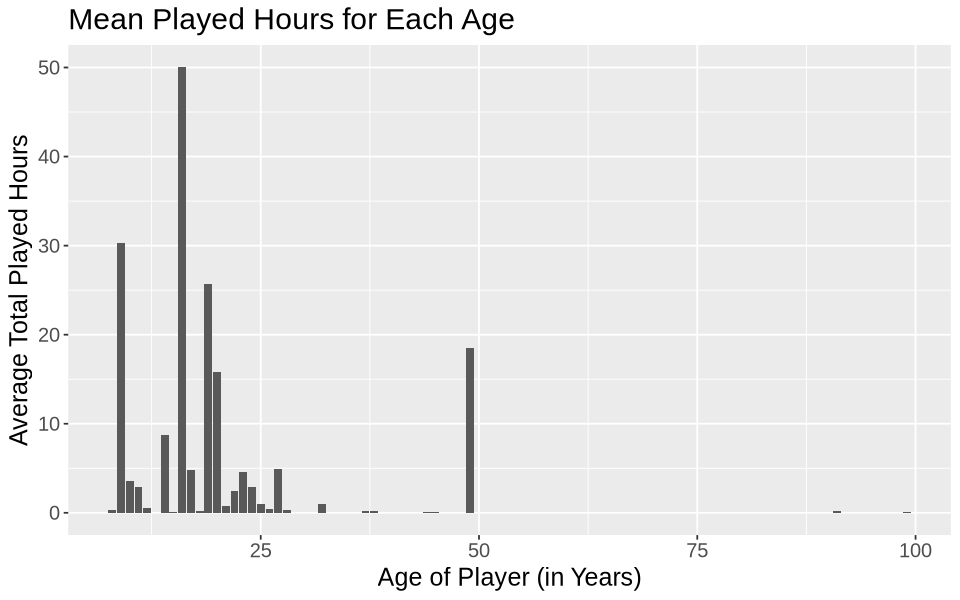

In [11]:
options(repr.plot.width = 8, repr.plot.height = 5)

players_summary_plot <- players_age_mean |>
    ggplot(aes(x = age, y = mean_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Age of Player (in Years)",
        y = "Average Total Played Hours") +
    theme(text = element_text(size = 15)) +
    ggtitle("Mean Played Hours for Each Age")

players_summary_plot

**EXPLAIN CHOICE OF ANALYSIS**

Therefore, we choose multivariable regression...
Explain categorical -> numerical

In [12]:
players_tidy_exp <- players_tidy |>
mutate(experience_num = case_when(experience == "Veteran" ~ 5,
                                  experience == "Beginner" ~ 1,
                                  experience == "Amateur" ~ 2,
                                 experience == "Regular" ~ 3,
                                 experience == "Pro" ~ 4,))
players_tidy_exp

experience,played_hours,gender,age,experience_num
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Pro,30.3,Male,9,4
Veteran,3.8,Male,17,5
Veteran,0.0,Male,17,5
⋮,⋮,⋮,⋮,⋮
Amateur,0.0,Prefer not to say,17,2
Amateur,2.3,Male,17,2
Pro,0.2,Other,91,4


In [13]:
players_gender_new <- players_tidy_exp |>
mutate(gender = case_when(gender == "Male" ~ "Male",
                          gender == "Female"~ "Female",
                          TRUE ~ "Other"))
players_gender_new

experience,played_hours,gender,age,experience_num
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Pro,30.3,Male,9,4
Veteran,3.8,Male,17,5
Veteran,0.0,Male,17,5
⋮,⋮,⋮,⋮,⋮
Amateur,0.0,Other,17,2
Amateur,2.3,Male,17,2
Pro,0.2,Other,91,4


In [14]:
# Tidying our new "complete" dataset

players_tidy_new <- players_gender_new |>
mutate(gender_male = case_when(gender == "Male" ~ 1,
                               gender == "Female" ~ 0,
                               gender == "Other" ~ 0),
       gender_female = case_when(gender == "Male" ~ 0,
                                 gender == "Female" ~ 1,
                                 gender == "Other" ~ 0),
       gender_other = case_when(gender == "Male" ~ 0,
                                 gender == "Female" ~ 0,
                                 gender == "Other" ~ 1))
players_tidy_new

experience,played_hours,gender,age,experience_num,gender_male,gender_female,gender_other
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pro,30.3,Male,9,4,1,0,0
Veteran,3.8,Male,17,5,1,0,0
Veteran,0.0,Male,17,5,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,0.0,Other,17,2,0,0,1
Amateur,2.3,Male,17,2,1,0,0
Pro,0.2,Other,91,4,0,0,1


In [15]:
#Tidying our dataset of interest, players.csv; removing "repeats", keeping numerical values only

players_tidy <- players_tidy_new |>
select(played_hours, age, experience_num, gender_male, gender_female, gender_other)

players_tidy

played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30.3,9,4,1,0,0
3.8,17,5,1,0,0
0.0,17,5,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮
0.0,17,2,0,0,1
2.3,17,2,1,0,0
0.2,91,4,0,0,1


In [16]:
players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
training_set <- training(players_split) 
testing_set <- testing(players_split)

In [17]:
set.seed(800)

players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
training_set <- training(players_split) 
testing_set <- testing(players_split)

players_recipe <- recipe(played_hours ~ age + experience_num + gender_male + gender_female + gender_other, data = training_set)  |>
step_scale(all_predictors()) |>
step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("regression")

vfold <- vfold_cv(training_set, v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

players_results <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_spec) |>
tune_grid(resamples = vfold, grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse")

players_min <- players_results|>
filter(mean == min(mean))

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,rmse,standard,29.34474,5,9.134979,Preprocessor1_Model10


In [18]:
set.seed(800)

new_players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
set_engine("kknn") |>
set_mode("regression")

players_fit <- workflow() |>
add_recipe(players_recipe) |>
add_model(new_players_spec) |>
fit(data = training_set)

players_summary <- players_fit |>
predict(testing_set) |>
bind_cols(testing_set) |>
metrics(truth = played_hours, estimate = .pred) |>
filter(.metric == "rmse")
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,16.14136


**VISUALIZATIONS FROM ANALYSIS**

.pred,played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.03333333,0.0,17,5,1,0,0
1.36666667,0.1,21,3,1,0,0
16.16666667,0.0,17,2,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.66666667,0.8,22,2,0,1,0
0.06666667,32.0,22,2,1,0,0
1.03333333,1.7,17,4,1,0,0


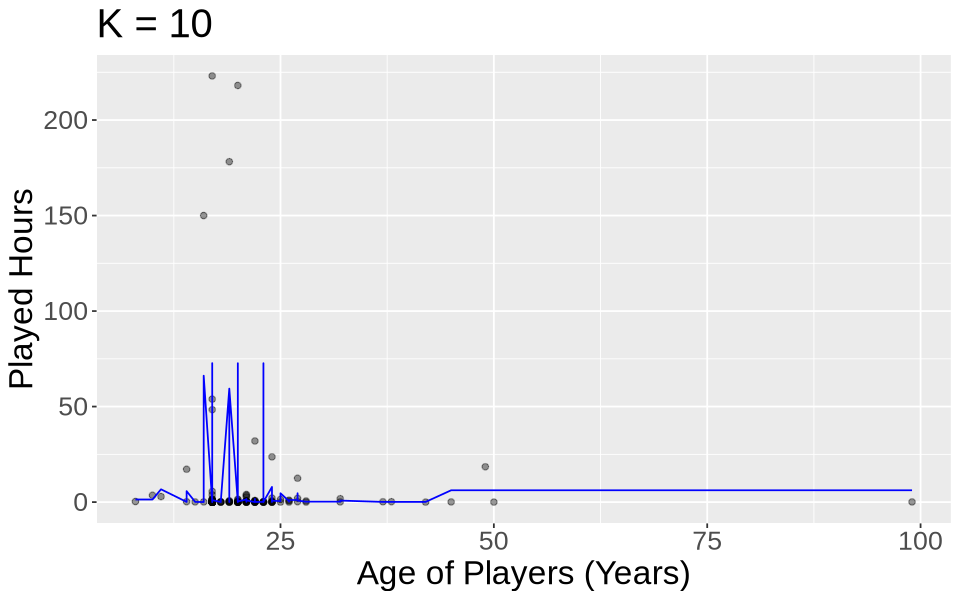

In [21]:
players_preds <- predict(players_fit, training_set) |>
    bind_cols(training_set)
players_preds

players_plot <- players_preds |>
    ggplot(aes(x = age, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = age, y = .pred),
             color = "blue") +
    labs(x = "Age of Players (Years)",
        y = "Played Hours") +
    ggtitle("K = 10") +
    theme(text = element_text(size = 20))

players_plot

.pred,played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.03333333,0.0,17,5,1,0,0
1.36666667,0.1,21,3,1,0,0
16.16666667,0.0,17,2,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.66666667,0.8,22,2,0,1,0
0.06666667,32.0,22,2,1,0,0
1.03333333,1.7,17,4,1,0,0


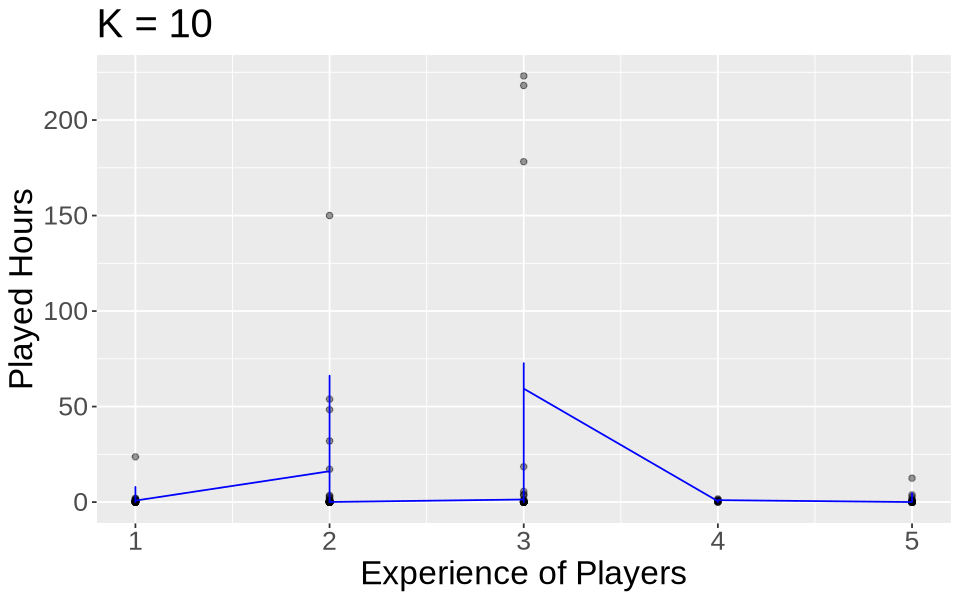

In [24]:
players_preds_2 <- predict(players_fit, training_set) |>
    bind_cols(training_set)
players_preds_2

players_plot_2 <- players_preds_2 |>
    ggplot(aes(x = experience_num, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = experience_num, y = .pred),
             color = "blue") +
    labs(x = "Experience of Players",
        y = "Played Hours") +
    ggtitle("K = 10") +
    theme(text = element_text(size = 20))
players_plot_2

.pred,played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.03333333,0.0,17,5,1,0,0
1.36666667,0.1,21,3,1,0,0
16.16666667,0.0,17,2,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.66666667,0.8,22,2,0,1,0
0.06666667,32.0,22,2,1,0,0
1.03333333,1.7,17,4,1,0,0


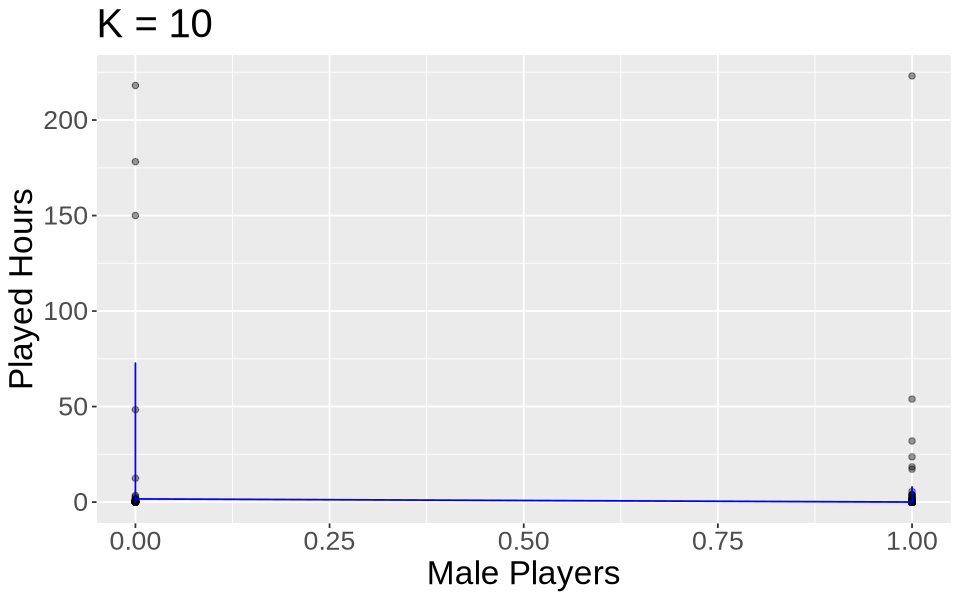

In [25]:
players_preds_3 <- predict(players_fit, training_set) |>
    bind_cols(training_set)
players_preds_3

players_plot_3 <- players_preds_3 |>
    ggplot(aes(x = gender_male, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = gender_male, y = .pred),
             color = "blue") +
    labs(x = "Male Players",
        y = "Played Hours") +
    ggtitle("K = 10") +
    theme(text = element_text(size = 20))
players_plot_3

.pred,played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.03333333,0.0,17,5,1,0,0
1.36666667,0.1,21,3,1,0,0
16.16666667,0.0,17,2,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.66666667,0.8,22,2,0,1,0
0.06666667,32.0,22,2,1,0,0
1.03333333,1.7,17,4,1,0,0


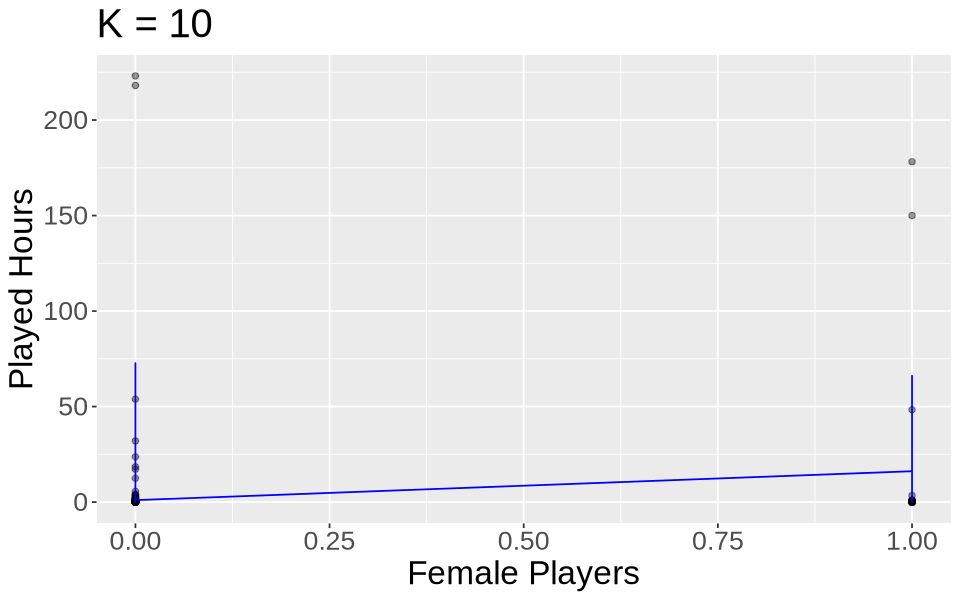

In [26]:
players_preds_4 <- predict(players_fit, training_set) |>
    bind_cols(training_set)
players_preds_4

players_plot_4 <- players_preds_4 |>
    ggplot(aes(x = gender_female, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = gender_female, y = .pred),
             color = "blue") +
    labs(x = "Female Players",
        y = "Played Hours") +
    ggtitle("K = 10") +
    theme(text = element_text(size = 20))
players_plot_4

.pred,played_hours,age,experience_num,gender_male,gender_female,gender_other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.03333333,0.0,17,5,1,0,0
1.36666667,0.1,21,3,1,0,0
16.16666667,0.0,17,2,0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.66666667,0.8,22,2,0,1,0
0.06666667,32.0,22,2,1,0,0
1.03333333,1.7,17,4,1,0,0


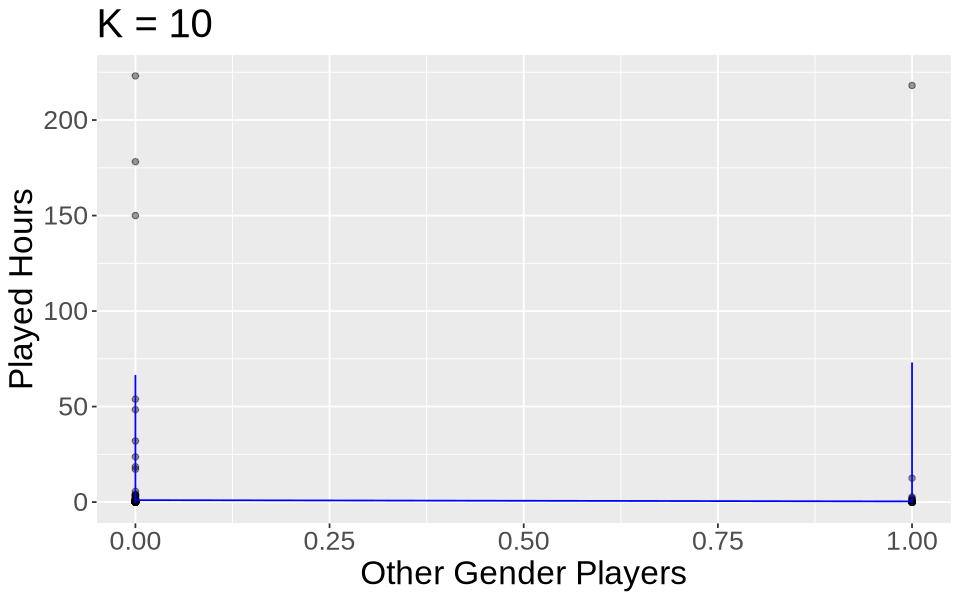

In [27]:
players_preds_5 <- predict(players_fit, training_set) |>
    bind_cols(training_set)
players_preds_5

players_plot_5 <- players_preds_5 |>
    ggplot(aes(x = gender_other, y = played_hours )) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_preds,
             mapping = aes(x = gender_other, y = .pred),
             color = "blue") +
    labs(x = "Other Gender Players",
        y = "Played Hours") +
    ggtitle("K = 10") +
    theme(text = element_text(size = 20))
players_plot_5

### Discussion

Summarize what was found... was this expected? 

### References